This is my first Kaggle kernel - An implementation of very basic data analysis tasks with  iris database. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt 

from scipy import stats



### Loading the data

In [2]:
#load the dataset

iris = pd.read_csv("/kaggle/input/iris/Iris.csv") #load the dataset


The first step in any data analysis process is data cleaning.The objective of data cleaning is to refine the input data into a quality data.Incorrect or inconsistent data can lead to false conclusions. 

High quality data needs to pass a set of quality criterias such as : Validity, Accuracy, Completeness, Consistency and Uniformity. To ensure that the given dataset pass these crieterias , we follow a sequence of procedures that are iteratively refined, as follows : Inspection, Cleaning, Verifying and reporting.

## 1. Data Inspection : Data profiling
A summary statistics about the data, called data profiling is really helpful to give a general idea about the quality of the data. Pandas library provide different methods for this purpose. 

In [3]:
# find dimensions of the dataset
iris.shape  #150 rows and 6 columns

(150, 6)

In [4]:
# get the column names
columns = list(iris)
iris.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#Dislpay a sample of the dataset

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Get the count for each class
iris['Species'].value_counts() #50 each for each class . Total 3 classes.

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
# Method 1 : Pandas.DataFrame.info(self, verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)
# This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
# Returns None.The memory_usage parameter allows deep introspection mode, specially useful for big DataFrames and fine-tune memory optimization:

iris.info(memory_usage='deep') #No missing values found.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


In [8]:
#dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe
iris.drop('Id',axis=1,inplace=True) 

In [9]:
# Method 2 : Pandas.DataFrame.describe(self, percentiles=None, include=None, exclude=None)
# Generate descriptive statistics that summarize the central tendency, dispersion and 
# shape of a dataset’s distribution, excluding NaN values.

iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2 Data inspection : Visualization

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. Visualization helps us to identify and analyse the distributions more easily and effectively.

### 2.1 Plotting Univariate distributions
#### 2.1.1 Distplot

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

A  <b> histogram </b> helps you discover, and show, the underlying frequency distribution (shape) of a set of continuous data.A <b> KDE </b> , on the other hand,is a fundamental data smoothing problem and provides a smooth curve to show the shape of the data under observation.


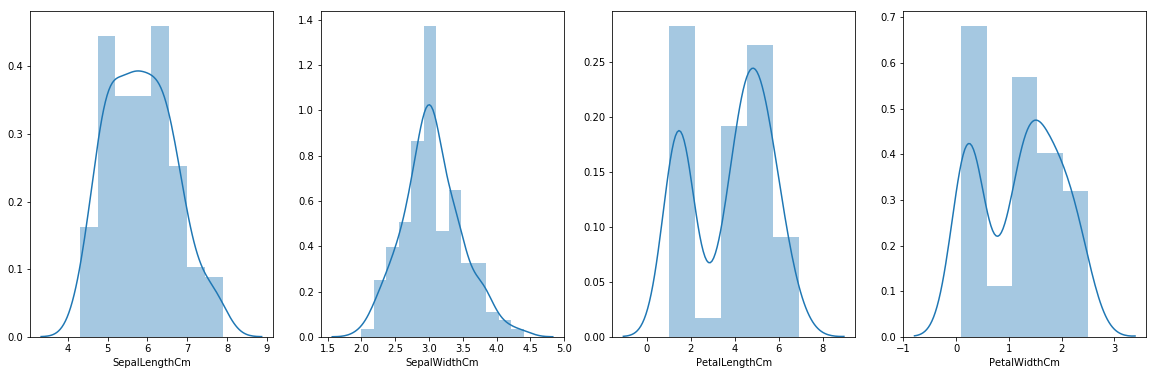

In [10]:
fig, ax =plt.subplots(1,4,figsize=(20,6))

    
sns.distplot(iris.SepalLengthCm,ax=ax[0])
sns.distplot(iris.SepalWidthCm,ax=ax[1])
sns.distplot(iris.PetalLengthCm,ax=ax[2])
sns.distplot(iris.PetalWidthCm,ax=ax[3])

fig.show()


We can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data. (fit = stats.norm / normal distribution) 

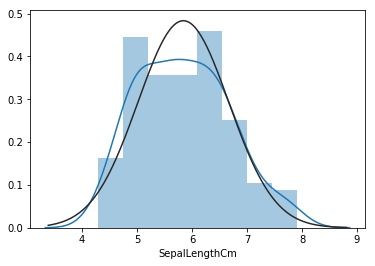

In [11]:
sns.distplot(iris.SepalLengthCm, kde=True, fit=stats.norm);

#### 2.1.2 Boxplot
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It helps us to identify the outliers and what their values are. It can also tell  whether the data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

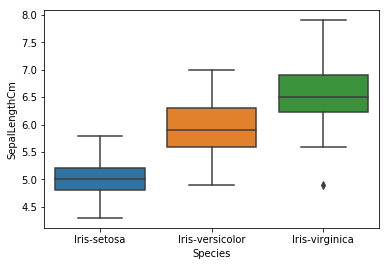

In [12]:
sns.boxplot(x="Species", y="SepalLengthCm", data=iris)

#### 2.1.3 Violin Plot
Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.The advantage of a violin plot is that it can show nuances in the distribution that aren’t noticeable in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data.

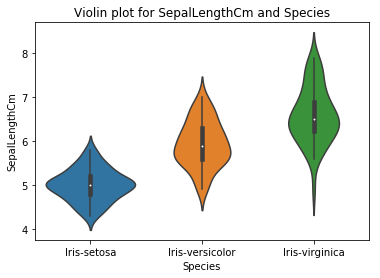

In [13]:
sns.violinplot(x="Species",y="SepalLengthCm",data = iris)
plt.title("Violin plot for SepalLengthCm and Species")
plt.show()


#### 2.1.4 Swarm plot
A categorical scatterplot with non-overlapping points. It is a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

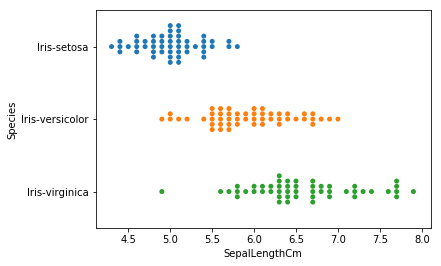

In [14]:
ax = sns.swarmplot(x="SepalLengthCm", y="Species", data=iris)

### 2.2 Building structured multi-plot grids using FacetGrid class

The FacetGrid class is useful to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. 

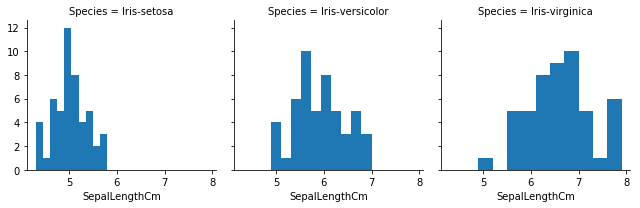

In [15]:
g = sns.FacetGrid(iris, col="Species")
g.map(plt.hist, "SepalLengthCm");

### 2.3 Plotting bivariate distributions

#### 2.3.1 scatterplots
The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values.

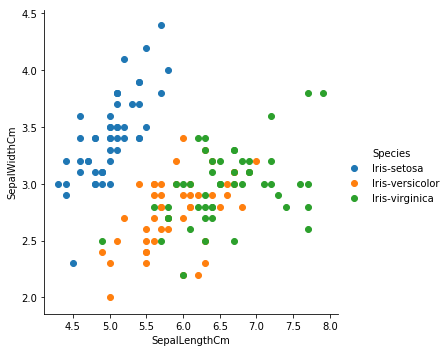

In [16]:
sns.FacetGrid(data=iris,hue="Species",height=5).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()

#### 2.3.2 Hexbin plot

The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large dataset.

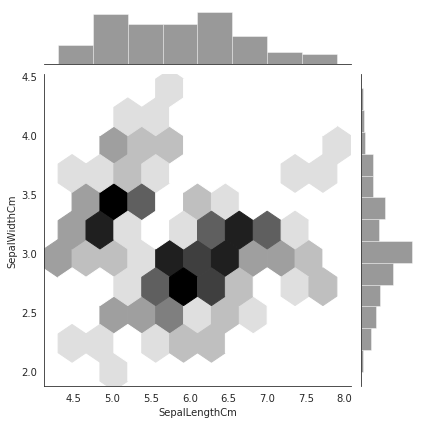

In [17]:
with sns.axes_style("white"):
    sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", kind="hex", color="k",data=iris);

#### 2.3.3 Kernel density estimation Contour plot
<b> KDE </b> can be also used to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot. <b>Contour plots </b> are a way to show 3d surface on a 2d plane. it graphs two predictor variable on x and y axis; and response variable Z as contours.

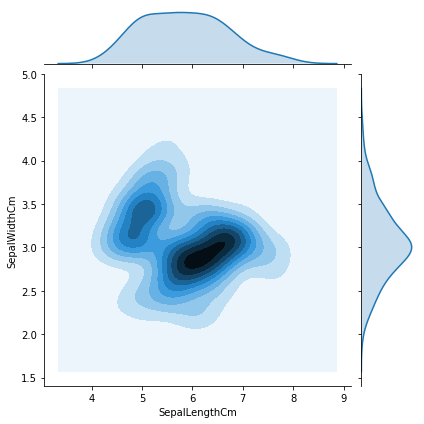

In [18]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, kind="kde");


#### 2.3.4 Heat map
Heat map is used to find out the correlation between different features in the dataset.

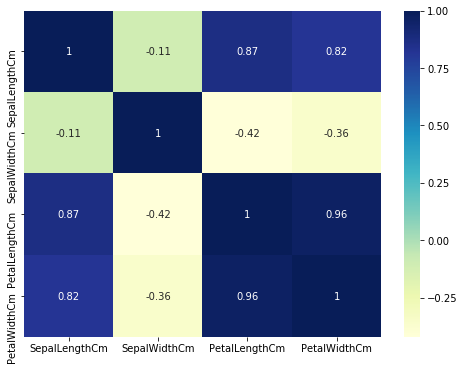

In [19]:
plt.figure(figsize=(8,6)) 
sns.heatmap(iris.corr(),annot=True,cmap="YlGnBu") #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()  

SepalLength and SepalWidth have low negative correlation. PetalLength and PetalWidth have high positive correlation. Correlation metrics helps us to choose features for machine learning models.

### 2.3.5 Pair Plot
Plot pairwise relationships in a dataset.They are scatterplots created by pairing all combinations of features.

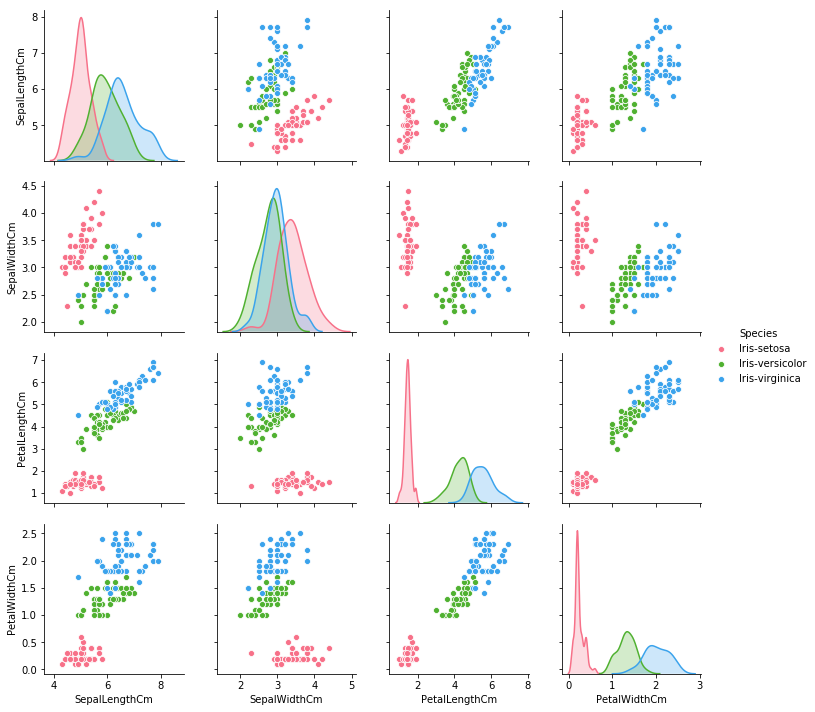

In [20]:
g = sns.pairplot(iris, hue="Species", palette="husl")